
## Background and Context

    Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

    Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

    The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

    Data Dictionary
    
    CustomerId: Unique ID which is assigned to each customer
    Surname: Last name of the customer 
    CreditScore: It defines the credit history of the customer.  
    Geography: A customer’s location    
    Gender: It defines the Gender of the customer   
    Age: Age of the customer     
    Tenure: Number of years for which the customer has been with the bank
    NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
    Balance: Account balance
    HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
    EstimatedSalary: Estimated salary 
    isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
    Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 

        0=No ( Customer did not leave the bank )
        1=Yes ( Customer left the bank )

### Import Necessary Libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# To build logistic regression model
from sklearn.linear_model import LogisticRegression

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# To get diferent metric scores
from sklearn import metrics

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
sns.set(style="darkgrid")
# adds a nice background to the graphs
sns.set(color_codes=True)
# To supress numerical display in scientific notations
pd.set_option("display.float_format", lambda x: "%.2f" % x)
sns.set_palette("pastel")  # Set the palette to the "pastel"

<IPython.core.display.Javascript object>

In [2]:
bankData = pd.read_csv("bank.csv")

<IPython.core.display.Javascript object>

In [3]:
# Making copy of dataframe
data = bankData.copy()

<IPython.core.display.Javascript object>

In [4]:
data.shape

(10000, 14)

<IPython.core.display.Javascript object>

* Dataset has 10000 rows and 14 columns

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<IPython.core.display.Javascript object>

In [6]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<IPython.core.display.Javascript object>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

## Observation 
* No rows has missing records.
* RowNumber, CustomerId and Surname doesn't add any value to analysis,  so we'll drop these columns.
* We'll convert Geography, Gender, NumbeOfProducts, HasCrCad, isActiveMember  and Exited to type category.

In [8]:
# Dropping RowNumber and CustomerId columns
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [9]:
# Checking for null values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<IPython.core.display.Javascript object>

* There is no null records

In [10]:
# checking for duplicate records
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There is no duplicate records

## Find the unique value counts for each labels

In [11]:
for col in data.columns:
    totalval = data[col].value_counts()
    
    
    if(totalval.count() > 5):
        print("\nDisplaying top 5 of {0} records for {1}".format(totalval.count(),col))
        print(totalval.head(5))
    else: 
        print("\nDisplaying {0} records for {1}".format(totalval.count(),col))
        print(totalval.head())
    print("*"*50)



Displaying top 5 of 460 records for CreditScore
850    233
678     63
655     54
705     53
667     53
Name: CreditScore, dtype: int64
**************************************************

Displaying 3 records for Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************

Displaying 2 records for Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************

Displaying top 5 of 70 records for Age
37    478
38    477
35    474
36    456
34    447
Name: Age, dtype: int64
**************************************************

Displaying top 5 of 11 records for Tenure
2    1048
1    1035
7    1028
8    1025
5    1012
Name: Tenure, dtype: int64
**************************************************

Displaying top 5 of 6382 records for Balance
0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
Name: Balance, dtype: int64
*******

<IPython.core.display.Javascript object>

In [12]:
# Converting Columns to type categorical
cat_cols = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]
for col in cat_cols:
    data[col] = data[col].astype("category")

<IPython.core.display.Javascript object>

In [13]:
data.Exited.value_counts() / data.Exited.count()

0   0.80
1   0.20
Name: Exited, dtype: float64

<IPython.core.display.Javascript object>

* Although exited customer records are not far lesser proportion than exited customer but 
it is suffcient to train model around it.

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


<IPython.core.display.Javascript object>

## Observation
* Mean of credit score is close to meadian. Data seems to be normally distributed.
* Age is slightly right skewed with minimum age of 18 amd maximum of 92
* Mean of Tenure is equal to meadian, Data seems to be normally distributed.
* Account Balance is left skewed with minimum balance of 0 and maximum balance of 250898.
* EstimatedSalary mean and median value is very close to each other.Although there is min salary of 11.58 which seems to data error and max salary is 199992.

In [15]:
data.describe(include=["category"]).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151


<IPython.core.display.Javascript object>

## Observation

* Geography column has tree unique values with maximum values from france
* Majority of gender is Male
* There are 4 types of Products , with Number 1 products represent more than half.
* Almost 70% customers  has cards
* Active or Inactive memebers are almost half.
* 80% of customers are current customer of bank.

## EDA

### Univariate analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

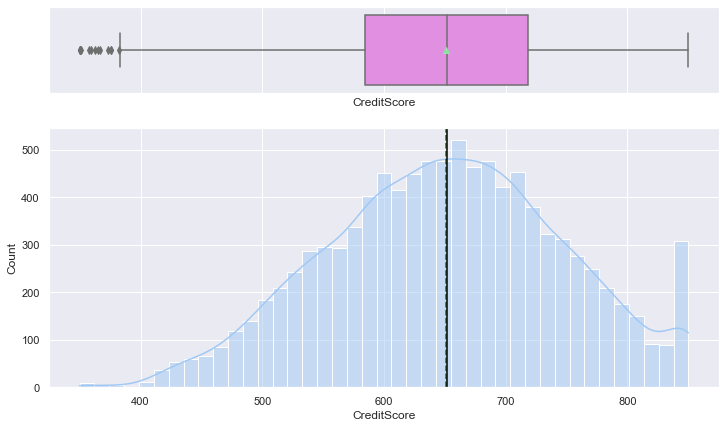

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data, "CreditScore", kde=True)

* Creditscore is almost normally distributed.
* There is slight tail on left and may ouliers on lower credit score. But there is high number of peoples
  with maximum scores 

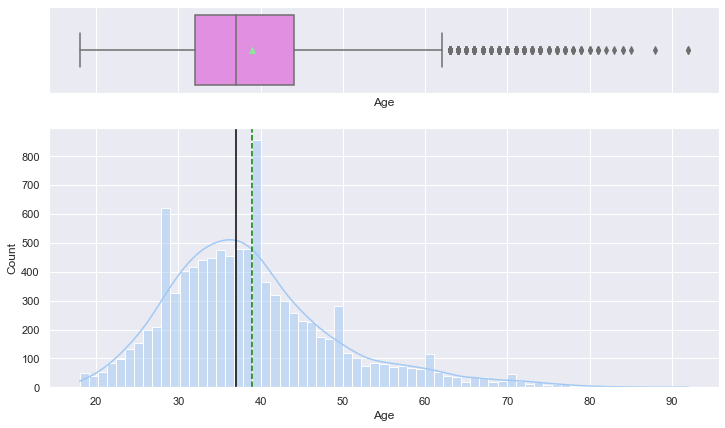

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(data, "Age", kde=True)

* Age is showing normal distribution with long tail  to the right.
* There is also good number of customer with age 29 and 40.

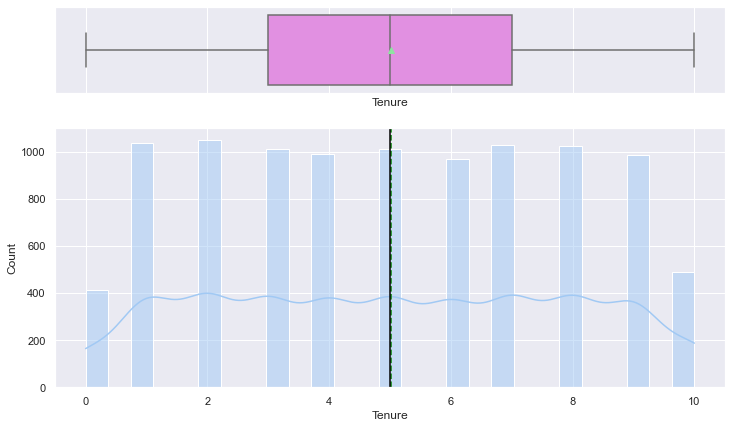

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(data, "Tenure", kde=True)

* Number of customers more than 0 and less than 9 years almost same.
* Only new customers and customer tenure with 10 years are less than the customers of all other category.

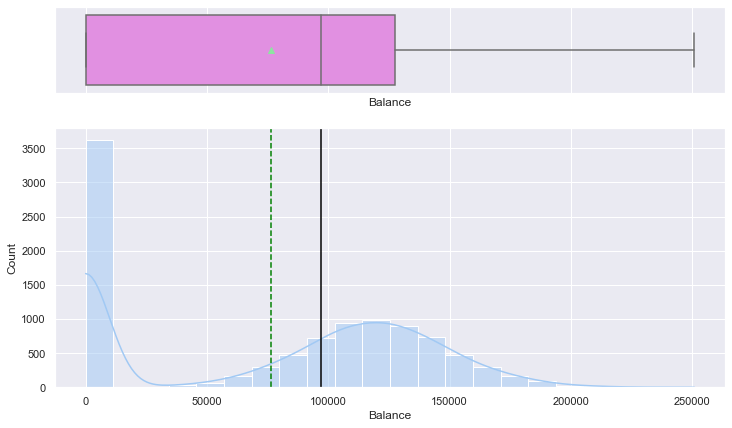

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "Balance", kde=True)

* Balance of customers are notmally distributed.
* There is large number of customers with 0 balance.

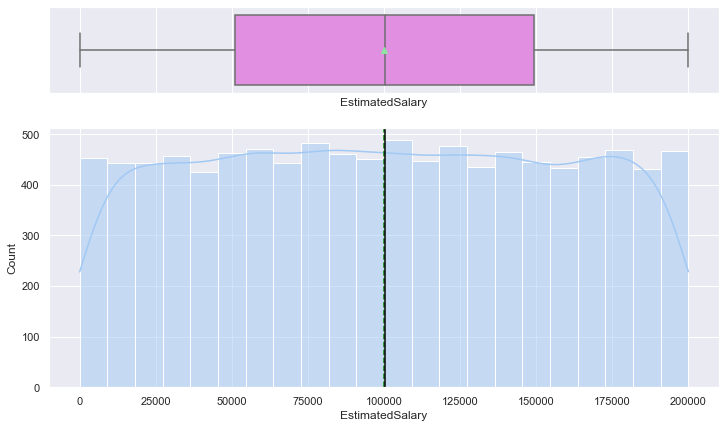

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(data, "EstimatedSalary", kde=True)

* customer count for EstimatedSalary is almost same in all range.

In [22]:
def perc_on_bar(z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    # plt.xticks(rotation=45)
    ax = sns.countplot(data[z])
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

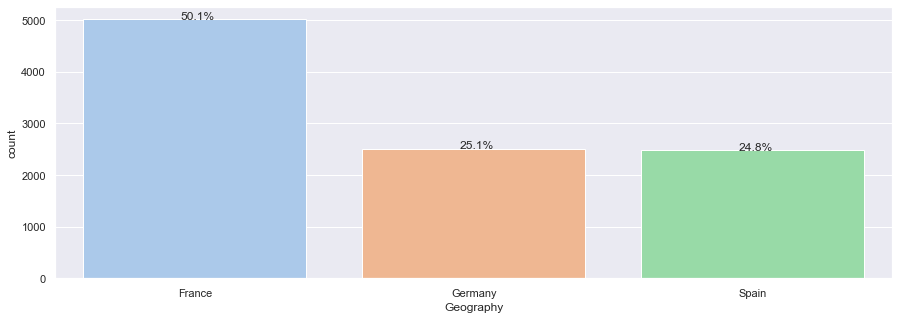

<IPython.core.display.Javascript object>

In [23]:
perc_on_bar("Geography")

* France has highest numbers of customers
* Customers Germany and Spain is almost equal  and they are half in numbrs with respect to France.

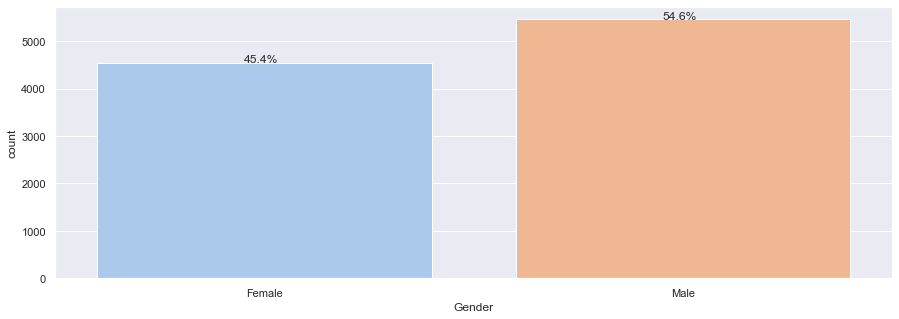

<IPython.core.display.Javascript object>

In [24]:
perc_on_bar("Gender")

* Majority of customers are male.

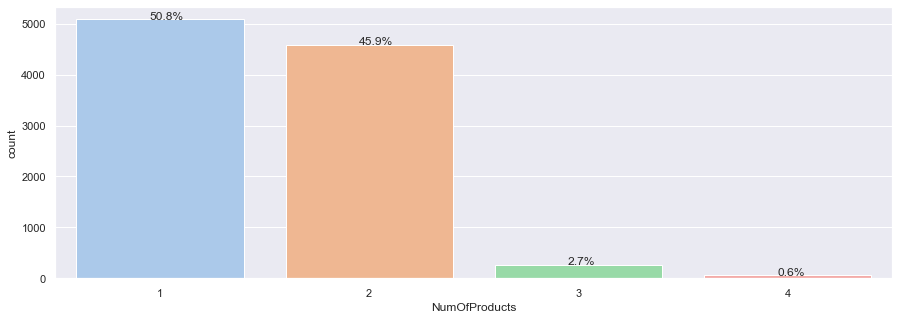

<IPython.core.display.Javascript object>

In [25]:
perc_on_bar("NumOfProducts")

* Majority of customers eitherprefer product 1 or product 2.
* Number of customers for product 2 and 4 are extremely less than products 1 or 2.

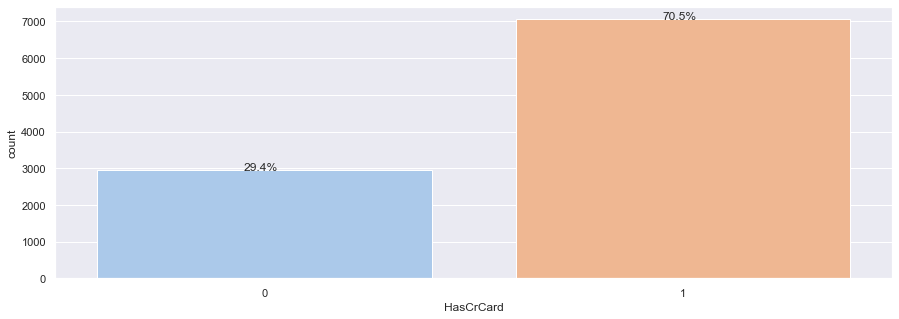

<IPython.core.display.Javascript object>

In [26]:
perc_on_bar("HasCrCard")

* 70.5% has bank's credit card
* 29.4% customer don't have credit cards. Bank can comeup with plan to attract this segment of customers.

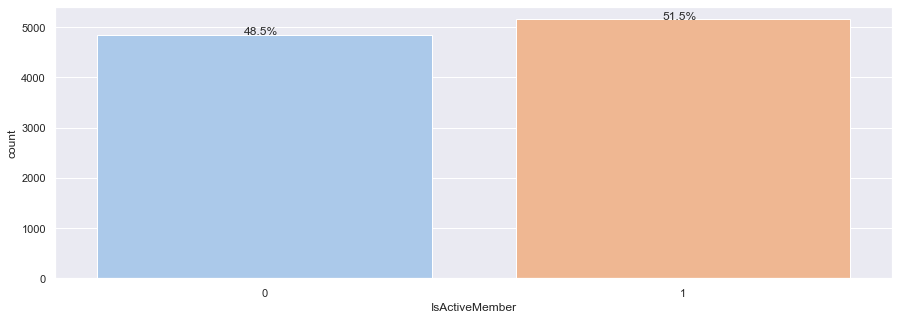

<IPython.core.display.Javascript object>

In [27]:
perc_on_bar("IsActiveMember")

* 51.5% precent of customers are active customers
* But 48.5% not active customers. Which needs to be analyzed.

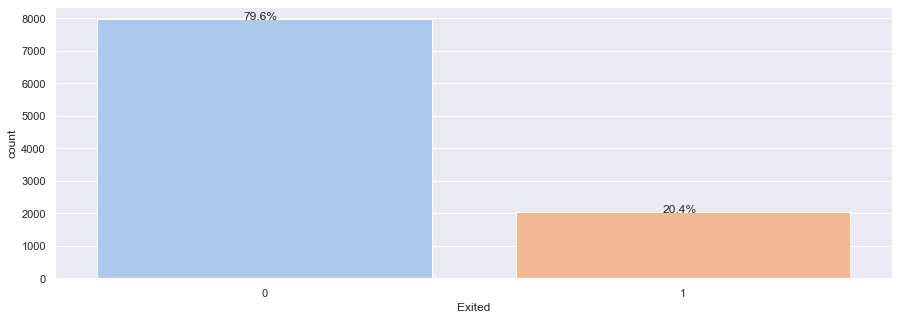

<IPython.core.display.Javascript object>

In [28]:
perc_on_bar("Exited")

* Almost 80% of customres are existing customers and 20% has left the bank service.

### Bivariate Analysis

**Inspecting the coorelations**

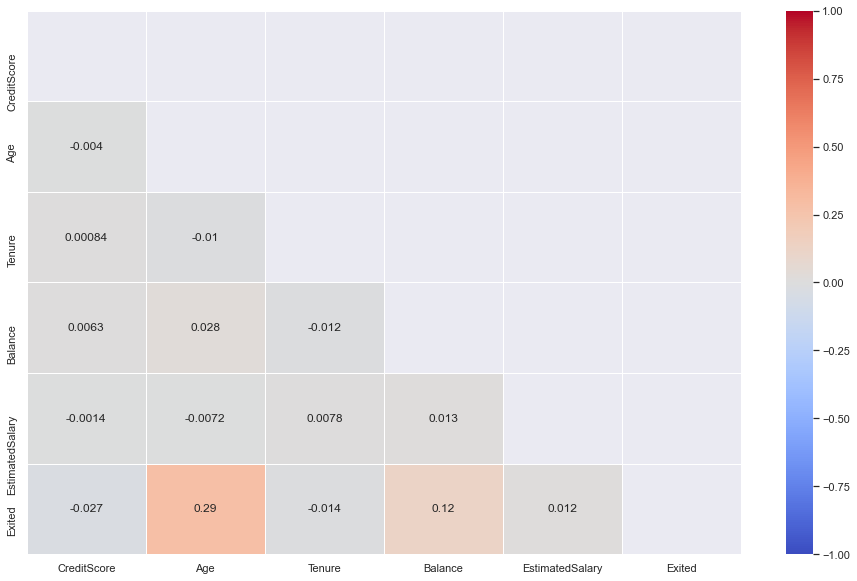

<IPython.core.display.Javascript object>

In [29]:
# Below steps  and configuration will create heat map for lower diagonal half only , as we know lower and
# upper half half contains same value but with differnt order of axis.
def gen_heatmap(corrDF):
    cgf_mask = np.zeros_like(corrDF, dtype=np.bool)
    cgf_mask[np.triu_indices_from(cgf_mask)] = True
    fig, ax = plt.subplots(figsize=(16, 10))
    sns.heatmap(
        corrDF,
        annot=True,
        mask=cgf_mask,
        cmap="coolwarm",
        vmax=1,
        vmin=-1,
        center=-0,
        linewidths=1,
        cbar_kws={"shrink": 1},
    )


gen_heatmap(data.corr())

* There is no storng coorelation among any features.
* Only Exited and Age is showing coorealtion of 0.29 i.e. there is slight coorealtion of age with customer 
  leaving the bank's service

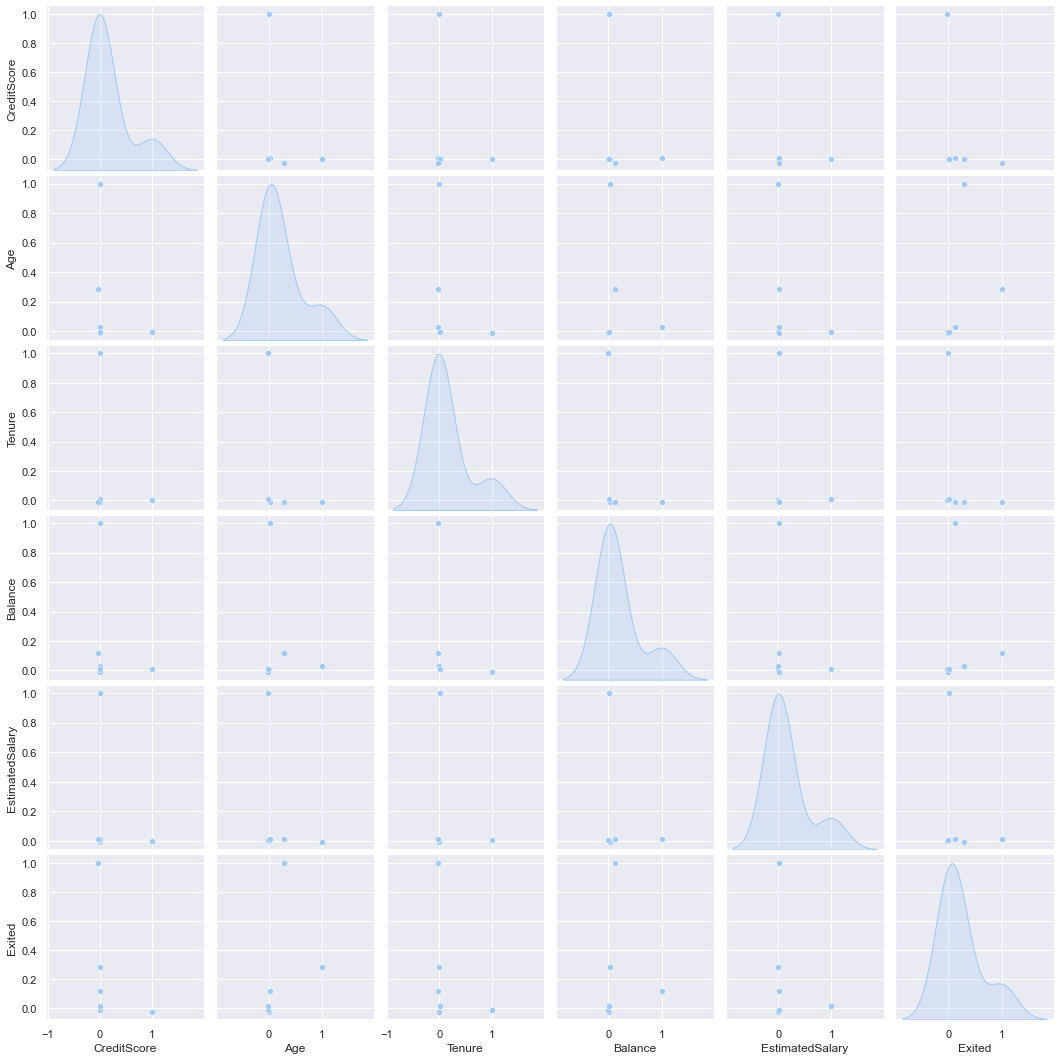

<IPython.core.display.Javascript object>

In [30]:
sns.pairplot(data.corr(), diag_kind="kde")
plt.show()

* Pair plot is not giving much details about the coorealtion.

In [31]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 115)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
-------------------------------------------------------------------------------------------------------------------


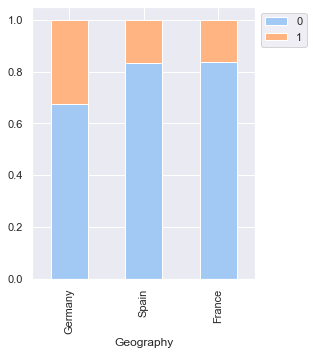

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(data, "Geography", "Exited")

* Most customers who exited are from Germany. 
* Ration for Spain and France is almost same.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
-------------------------------------------------------------------------------------------------------------------


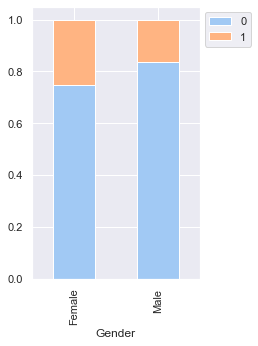

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(data, "Gender", "Exited")

* Feamle are leaving the bank service more than male customers

Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
48        88    80    168
47        98    77    175
42       244    77    321
49        72    75    147
44       184    73    257
39       351    72    423
50        63    71    134
41       297    69    366
51        53    66    119
52        38    64    102
38       414    63    477
37       416    62    478
35       417    57    474
36       403    53    456
54        33    51     84
56        20    50     70
55        34    48     82
33       398    44    442
53        34    40     74
57        37    38     75
34       414    33    447
31       371    33    404
32       386    32    418
60        30    32     62
59        32    30     62
58        38    29     67
29       320    28    348
30       303    24    327
28       250    23    273
62        31    21     52
61        32    21     53
63        22

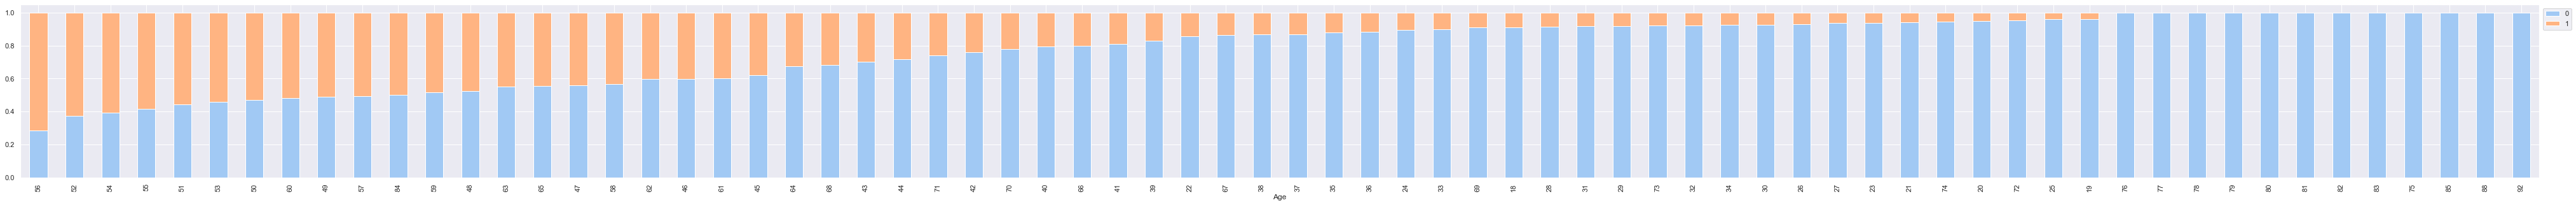

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(data, "Age", "Exited")

* Customers Exited has mixed trend among all ages.
* Customer who is close to retirement age has more chances of exiting.

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
-------------------------------------------------------------------------------------------------------------------


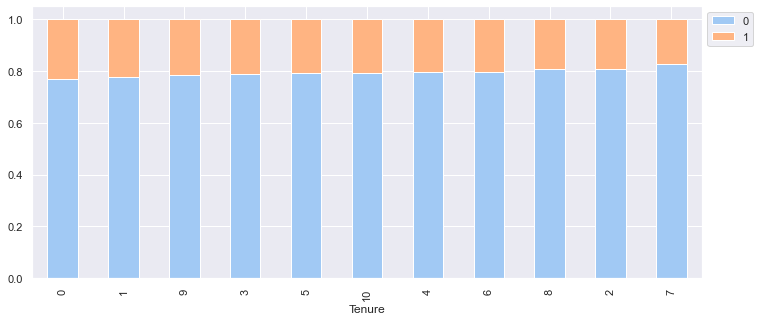

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(data, "Tenure", "Exited")

* Exiting rate for Customers from all tenure has been almost equal.
* But newest customer Exit rat is highest.

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
-------------------------------------------------------------------------------------------------------------------


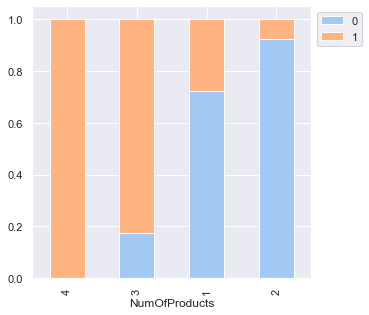

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "NumOfProducts", "Exited")

* Rate of customers leaving  the products 4 and 3 are extremely high. All the customers of product 4 has Exited,
* Product 2 has least exit rate.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
-------------------------------------------------------------------------------------------------------------------


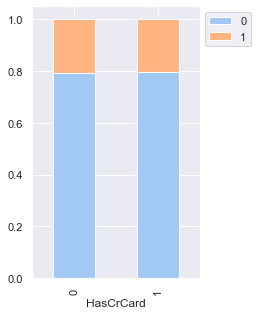

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "HasCrCard", "Exited")

* There is no difference between Exit ratio of people who has Card and No Card.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There is no duplicate values in the dataset.
- There are no missing values in the data.
- Most of the data-types are either **int64** or **Object**.
- We converted `Geography`, `Gender`, `NumOfProducts`, `HasCrCard`, `IsActiveMember` to categorical type. 

**Data Cleaning:**
- No Data Cleaning is required.
    
**Actions for data pre-processing:**

* We dropped CustomerId and Surname, which was not contributing to data analysis.
* We will standarize numerical columns and One hot encode the all categorical columns.

### Data Preparation

In [38]:
# Standardizing the required columns

cols_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# create and fit scaler
scaler = StandardScaler()
scaler.fit(data[cols_to_scale])
# scale selected data
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

scaled_data = pd.DataFrame(
    data,
    columns=data.drop(["Exited"], axis=1).columns,
)

scaled_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.33,France,Female,0.29,-1.04,-1.23,1,1,1,0.02
1,-0.44,Spain,Female,0.20,-1.39,0.12,1,0,1,0.22
2,-1.54,France,Female,0.29,1.03,1.33,3,1,0,0.24
3,0.50,France,Female,0.01,-1.39,-1.23,2,0,0,-0.11
4,2.06,Spain,Female,0.39,-1.04,0.79,1,1,1,-0.37


<IPython.core.display.Javascript object>

In [39]:
# creating dummy variables for the categorical features
scaled_data = pd.get_dummies(scaled_data, drop_first=True)
scaled_data

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
0,-0.33,0.29,-1.04,-1.23,0.02,0,0,0,0,0,0,1,1
1,-0.44,0.20,-1.39,0.12,0.22,0,1,0,0,0,0,0,1
2,-1.54,0.29,1.03,1.33,0.24,0,0,0,0,1,0,1,0
3,0.50,0.01,-1.39,-1.23,-0.11,0,0,0,1,0,0,0,0
4,2.06,0.39,-1.04,0.79,-0.37,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.25,0.01,-0.00,-1.23,-0.07,0,0,1,1,0,0,1,0
9996,-1.39,-0.37,1.72,-0.31,0.03,0,0,1,0,0,0,1,1
9997,0.60,-0.28,0.69,-1.23,-1.01,0,0,0,0,0,0,0,1
9998,1.26,0.29,-0.70,-0.02,-0.13,1,0,1,1,0,0,1,0


<IPython.core.display.Javascript object>

In [40]:
y_data = data["Exited"].copy()

print(scaled_data.shape)
print(y_data.shape)

(10000, 13)
(10000,)


<IPython.core.display.Javascript object>

### Splitting Data in train test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data, y_data, test_size=0.2, random_state=7
)

<IPython.core.display.Javascript object>

In [42]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:\n", y_train.value_counts(normalize=True))
print("Percentage of classes in test set:\n", y_test.value_counts(normalize=True))

Shape of Training set :  (8000, 13)
Shape of Test set :  (2000, 13)
Percentage of classes in training set:
 0   0.80
1   0.20
Name: Exited, dtype: float64
Percentage of classes in test set:
 0   0.79
1   0.21
Name: Exited, dtype: float64


<IPython.core.display.Javascript object>

### Model insight and evaluation criterion:

- **True Positives:**
    - Reality: A customer is Exiting.
    - Model predicted: Customer will be Existing.
    - Outcome: Customer will be Exitign the Bank, resulting loss in revenue.
    
- **True Negatives:**
    - Reality: A customer is NOT Exiting.
    - Model predicted: Customer will NOT be Exiting.
    - Outcome: Customer will be contributing to banks revenue.

- **False Positives:**
    - Reality: A customer is NOT Exiting.
    - Model predicted: Customer will be Exiting.
    - Outcome: Bank will be targetting marketing resource and offer to retain such customers. 
    
- **False Negatives:**
    - Reality: A customer is Exiting.
    - Model predicted: Customer will not be Exiting.
    - Outcome: Bank will overlooking such customers , who have been otherwise retained if marketing team approached 
      them or addressed their concerns.

### Which case is more important? 
* Predicting that customer is not exiting but he Exited. Banks may be spending resource to attarct customers who has no plan to leave bank and also completely overlooking customers who could have been retained.This will result into loss of business for bank.Therfore, we'll have focus to reduce False Negative.


### How to reduce this loss i.e need to reduce False Negative?
* Bank  would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify right set of customers who can exit.

## Building Deep neural network

In [43]:
# initialize the model
model = Sequential()

<IPython.core.display.Javascript object>

### Adding layers

In [44]:
# Input layer with 13 dimensions for first hidden layer (units)
model.add(Dense(units=13, input_dim=13, activation="relu"))

# hidden layer
model.add(Dense(units=12, activation="relu"))
# Adding Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output
# We use the sigmoid because we want probability outcomes of customer Exited or not Exited
model.add(Dense(1, activation="sigmoid"))

<IPython.core.display.Javascript object>

### Model compilation

In [45]:
# Create optimizer with default learning rate
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

<IPython.core.display.Javascript object>

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 675
Trainable params: 675
Non-trainable params: 0
__________________________________________________________

<IPython.core.display.Javascript object>

### Training the model : Forward pass and Backpropagation

In [47]:
# fitting the model
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
640/640 [==============================] - 2s 2ms/step - loss: 0.4812 - accuracy: 0.7953 - val_loss: 0.4401 - val_accuracy: 0.7894
Epoch 2/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4133 - accuracy: 0.7989 - val_loss: 0.4220 - val_accuracy: 0.7981
Epoch 3/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4033 - accuracy: 0.8159 - val_loss: 0.4086 - val_accuracy: 0.8231
Epoch 4/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8323 - val_loss: 0.4075 - val_accuracy: 0.8431
Epoch 5/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3785 - accuracy: 0.8398 - val_loss: 0.4066 - val_accuracy: 0.8469
Epoch 6/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3746 - accuracy: 0.8444 - val_loss: 0.4010 - val_accuracy: 0.8494
Epoch 7/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8461 - val_loss: 0.3956 - val_accuracy: 0.8494
Epoch 

<IPython.core.display.Javascript object>

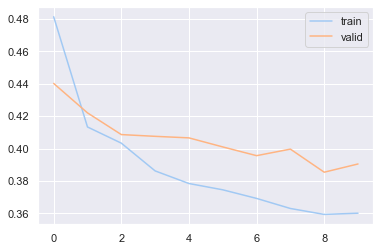

<IPython.core.display.Javascript object>

In [48]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

### Evaluation results are contained in a list

In [49]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8510


<IPython.core.display.Javascript object>

- The model achieves an accuracy of 85.40%.
- But this is not much improvement considering we alrready have 80% non Exit rate.

In [50]:
print(score)

[0.3819168508052826, 0.8510000109672546]


<IPython.core.display.Javascript object>

In [51]:
# defining empty lists to add results
dl_acc = []
dl_precision = []
dl_recall = []
dl_f1 = []


def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
            dl_acc.append(accuracy)
            dl_precision.append(precision)
            dl_recall.append(recall)
            dl_f1.append(f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

<IPython.core.display.Javascript object>

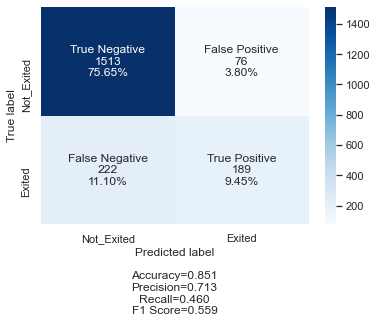

<IPython.core.display.Javascript object>

In [52]:
## Confusion Matrix on unseen test set
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i] > 0.5:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0


cm2 = confusion_matrix(y_test, y_pred1)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

**Observation:**

- There is good number of customer who has exited (false negative) which remains an issue. FN score is 0.46. We should be working improve the model to increase FN score.
- 76 customers is predicted as  Exit customer (false positive). Which is still good number. 
 
Our mode should be predicting optimized value for FN and FP and focussing on reducing FN cases.

###  Training Multi-layer perceptron with 4 hidden layers to get better recall

In [53]:
# Adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
                              verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights using hue_normal 
Model2.add(Dense(39, input_dim=13, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(39, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(26, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(13, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=40, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/40
640/640 [==============================] - 2s 2ms/step - loss: 0.6620 - accuracy: 0.7302 - val_loss: 0.5387 - val_accuracy: 0.7894
Epoch 2/40
640/640 [==============================] - 2s 4ms/step - loss: 0.5183 - accuracy: 0.7920 - val_loss: 0.5026 - val_accuracy: 0.7894
Epoch 3/40
640/640 [==============================] - 2s 3ms/step - loss: 0.4984 - accuracy: 0.7973 - val_loss: 0.4807 - val_accuracy: 0.7894
Epoch 4/40
640/640 [==============================] - 1s 2ms/step - loss: 0.4766 - accuracy: 0.7983 - val_loss: 0.4738 - val_accuracy: 0.7894
Epoch 5/40
640/640 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.7981 - val_loss: 0.4548 - val_accuracy: 0.7894
Epoch 6/40
640/640 [==============================] - 1s 2ms/step - loss: 0.4538 - accuracy: 0.7984 - val_loss: 0.4403 - val_accuracy: 0.7894
Epoch 7/40
640/640 [==============================] - 1s 2ms/step - loss: 0.4516 - accuracy: 0.7995 - val_loss: 0.4392 - val_accuracy: 0.7894
Epoch 

<IPython.core.display.Javascript object>

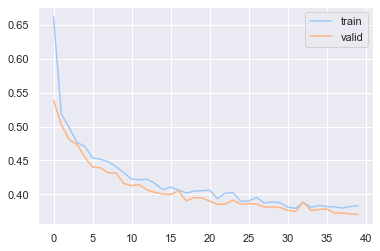

<IPython.core.display.Javascript object>

In [54]:
# Capturing learning history per epoch
hist = pd.DataFrame(his_mod2.history)
hist["epoch"] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "valid"), loc=0)

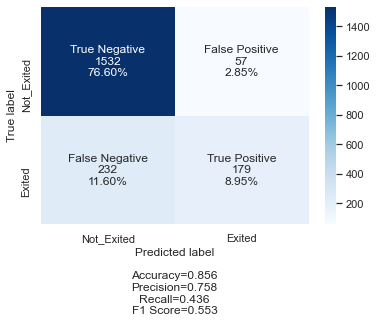

<IPython.core.display.Javascript object>

In [55]:
## Confusion Matrix on unsee test set
import seaborn as sn

y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i] > 0.5:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0


cm2 = confusion_matrix(y_test, y_pred1)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

**Observation:**

Recall of the model has reduced but the precision is improve. We'll try weighted loss for imbalance dataset

### Weighted loss to account for large class imbalance in train dataset

In [56]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    "balanced",
    np.unique(y_train),
    np.array([y_train.iloc[i] for i in range(len(y_train))]),
)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

<IPython.core.display.Javascript object>

- The class 'Exited' (y=1) is assigned a weight of 2.46 vs 0.627 for the class 'not Exited'. This allows the model to give more importance to the errors made on Exited cases during training.

In [57]:
model.fit(
    X_train, y_train, batch_size=10, epochs=40, class_weight=class_weights, shuffle=True
)

Epoch 1/40
800/800 [==============================] - 2s 2ms/step - loss: 0.5042 - accuracy: 0.8024
Epoch 2/40
800/800 [==============================] - 2s 2ms/step - loss: 0.4925 - accuracy: 0.7931
Epoch 3/40
800/800 [==============================] - 2s 2ms/step - loss: 0.4894 - accuracy: 0.7976
Epoch 4/40
800/800 [==============================] - 2s 2ms/step - loss: 0.4900 - accuracy: 0.7939
Epoch 5/40
800/800 [==============================] - 3s 3ms/step - loss: 0.4855 - accuracy: 0.7922
Epoch 6/40
800/800 [==============================] - 3s 3ms/step - loss: 0.4858 - accuracy: 0.7908
Epoch 7/40
800/800 [==============================] - 2s 2ms/step - loss: 0.4835 - accuracy: 0.7910
Epoch 8/40
800/800 [==============================] - 3s 3ms/step - loss: 0.4811 - accuracy: 0.7890
Epoch 9/40
800/800 [==============================] - 3s 3ms/step - loss: 0.4809 - accuracy: 0.7933
Epoch 10/40
800/800 [==============================] - 2s 3ms/step - loss: 0.4808 - accuracy: 0.7899

<IPython.core.display.Javascript object>

In [58]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.6760


<IPython.core.display.Javascript object>

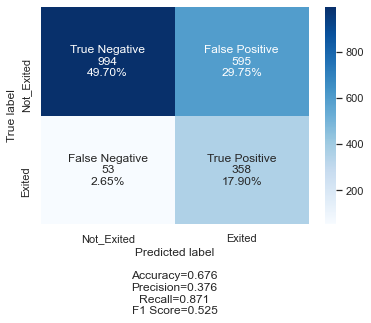

<IPython.core.display.Javascript object>

In [59]:
## Confusion Matrix on unsee test set
import seaborn as sn

y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i] > 0.5:
        y_pred1[i] = 1
    else:
        y_pred1[i] = 0


cm2 = confusion_matrix(y_test, y_pred1)
labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
categories = ["Not_Exited", "Exited"]
make_confusion_matrix(cm2, group_names=labels, categories=categories, cmap="Blues")

**Observation:** 

Recall has increased but the precision has reduced.Considering all three approach this model( Model-3) has given best optimized score among all above 3 analysis. 

We'll try logistic regression to see if model improves there. 

### Building Logistic regression Model

In [60]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        )
    )

    if flag == True:
        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        pred_train_prob = model.predict_proba(train)[:, 1]
        pred_test_prob = model.predict_proba(test)[:, 1]
        print("ROC-AUC Score on training set : ", roc_auc_score(train_y, pred_train))
        print("ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [61]:
def make_confusion_matrix_logistic(model, test_X, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth

    """
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [62]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

# checking model performances for this model
scores_LR = get_metrics_score(model, X_train, X_test, y_train, y_test)

Accuracy on training set :  0.842375
Accuracy on test set :  0.835
Recall on training set :  0.37884378843788435
Recall on test set :  0.34793187347931875
Precision on training set :  0.7104959630911188
Precision on test set :  0.697560975609756
F1 on training set :  0.49418371440032083
F1 on test set :  0.4642857142857142


<IPython.core.display.Javascript object>

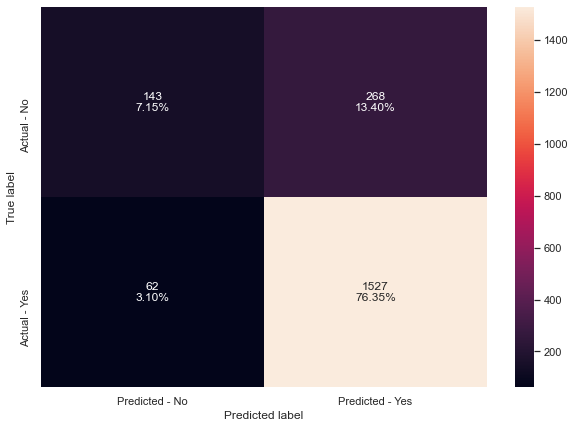

<IPython.core.display.Javascript object>

In [63]:
# creating confusion matrix
make_confusion_matrix_logistic(lg, X_test, y_test)

#### ROC AUC Curve

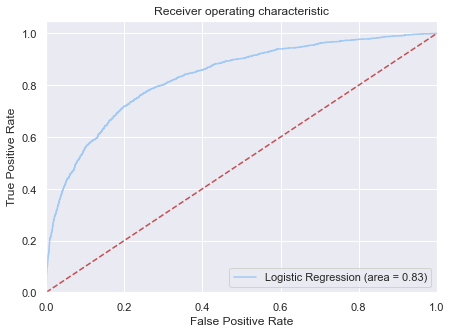

<IPython.core.display.Javascript object>

In [64]:
def display_ROC_AUC(model, X, Y):
    """
    model : classifier to predict values of X
    X: actual train set
    Y : actual result set

    """
    logit_roc_auc_train = roc_auc_score(Y, model.predict_proba(X)[:, 1])
    fpr, tpr, thresholds = roc_curve(Y, model.predict_proba(X)[:, 1])
    plt.figure(figsize=(7, 5))
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()


display_ROC_AUC(lg, X_train, y_train)

* ROC-AUC on test set

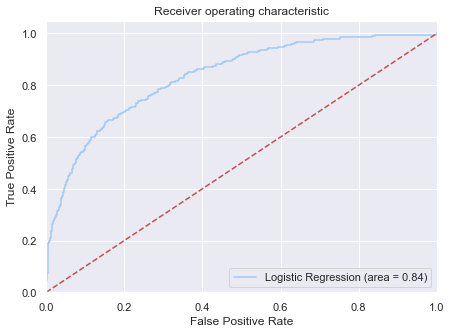

<IPython.core.display.Javascript object>

In [65]:
display_ROC_AUC(lg, X_test, y_test)

* Logistic Regression model is  is not giving  good performance on training and test set.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [66]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2756181933599486


<IPython.core.display.Javascript object>

In [67]:
scores_LR = get_metrics_score(
    lg, X_train, X_test, y_train, y_test, threshold=optimal_threshold_auc_roc, roc=True
)

Accuracy on training set :  0.804125
Accuracy on test set :  0.8085
Recall on training set :  0.6476014760147601
Recall on test set :  0.656934306569343
Precision on training set :  0.5144113336590131
Precision on test set :  0.52734375
F1 on training set :  0.5733732643615573
F1 on test set :  0.5850487540628386
ROC-AUC Score on training set :  0.7458277226324193
ROC-AUC Score on test set :  0.7523186322022297


<IPython.core.display.Javascript object>

* The precision of the model has reduced on training and test set.
* F1 score of the model has improved on training and test set
* Accuracy has decreased but recall has improved on training and test set.

#### Let's use Precision-Recall curve and see if we can find a better threshold

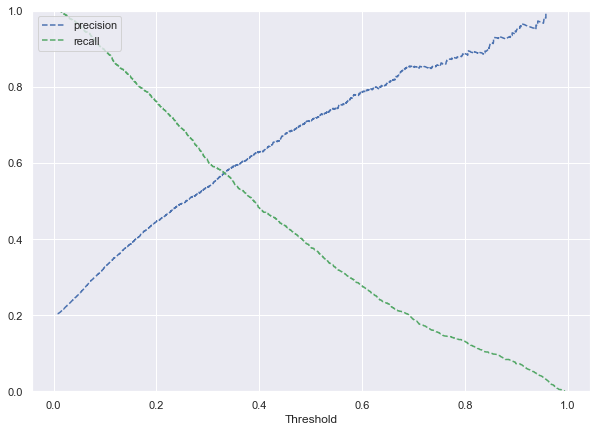

<IPython.core.display.Javascript object>

In [68]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.34, we get balanced recall and precision.

In [69]:
optimal_threshold_curve = 0.34

scores_LR = get_metrics_score(
    lg, X_train, X_test, y_train, y_test, threshold=optimal_threshold_curve, roc=True
)

Accuracy on training set :  0.829375
Accuracy on test set :  0.8315
Recall on training set :  0.566420664206642
Recall on test set :  0.5669099756690997
Precision on training set :  0.5825426944971537
Precision on test set :  0.5943877551020408
F1 on training set :  0.5743685687558466
F1 on test set :  0.5803237858032378
ROC-AUC Score on training set :  0.7314375049931862
ROC-AUC Score on test set :  0.733423521503524


<IPython.core.display.Javascript object>

* Model is performing well on training and test set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.34 as the optimal threshold.

### Sequential Feature Selector

#### Selecting subset of important features using Sequential Feature Selector method

In [70]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

<IPython.core.display.Javascript object>

In [71]:
# Fit the model on train
model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1, max_iter=100)

<IPython.core.display.Javascript object>

In [72]:
# Build model with all variables
sfs = SFS(
    model,
    k_features=13,
    forward=True,
    floating=False,
    scoring="roc_auc",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.1s finished

[2021-09-25 01:51:13] Features: 1/13 -- score: 0.7341793588075461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.4s finished

[2021-09-25 01:51:14] Features: 2/13 -- score: 0.7897204027523825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2021-09-25 01:51:14] Features: 3/13 -- score: 0.8022286087616609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2021-09-25 01:51:15] Features: 4/13 -- score: 0.81

<IPython.core.display.Javascript object>

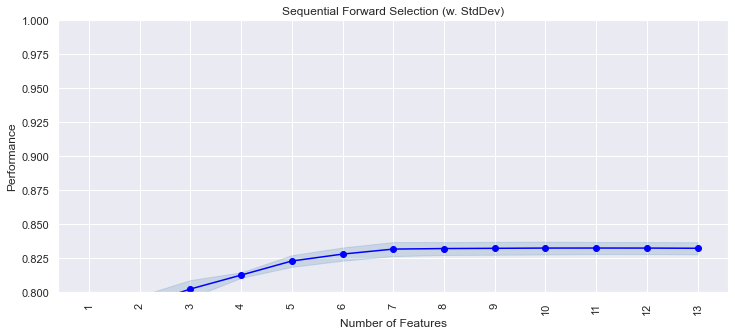

<IPython.core.display.Javascript object>

In [73]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(12, 5))
plt.ylim([0.8, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

* We can see that performance increases till the 7th feature. It is stable thereafter.
* So we'll use 7 features only to build our model but the choice of features it depends on the business context and use case of the model.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.4s finished

[2021-09-25 01:51:18] Features: 1/7 -- score: 0.7341793588075461[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.4s finished

[2021-09-25 01:51:19] Features: 2/7 -- score: 0.7897204027523825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2021-09-25 01:51:19] Features: 3/7 -- score: 0.8022286087616609[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2021-09-25 01:51:19] Features: 4/7 -- score: 0.812467

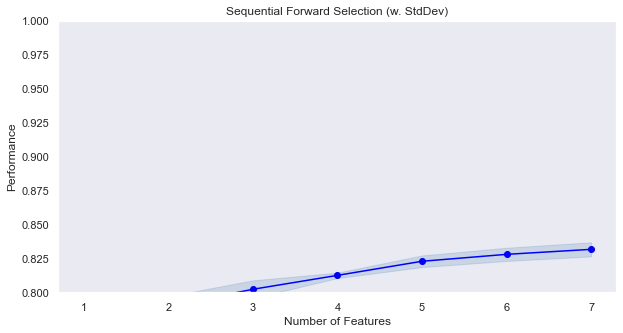

<IPython.core.display.Javascript object>

In [74]:
sfs1 = SFS(
    model,
    k_features=7,
    forward=True,
    floating=False,
    scoring="roc_auc",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(10, 5))

plt.ylim([0.8, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

In [75]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 5, 7, 8, 9, 10, 12]


<IPython.core.display.Javascript object>

**Let's look at best 7 variables**

In [76]:
X_train.columns[feat_cols]

Index(['Age', 'Geography_Germany', 'Gender_Male', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4', 'IsActiveMember_1'],
      dtype='object')

<IPython.core.display.Javascript object>

In [77]:
X_train_final = X_train[X_train.columns[feat_cols]]

# Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

<IPython.core.display.Javascript object>

In [78]:
# Fitting logistic regession model

logreg = LogisticRegression(
    solver="newton-cg",
    max_iter=1000,
    penalty="none",
    verbose=True,
    n_jobs=-1,
    random_state=0,
)

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

<IPython.core.display.Javascript object>

### Let's Look at model performance

Accuracy on training set :  0.84175
Accuracy on test set :  0.8335
Recall on training set :  0.3751537515375154
Recall on test set :  0.34549878345498786
Precision on training set :  0.7093023255813954
Precision on test set :  0.6893203883495146
F1 on training set :  0.49074818986323415
F1 on test set :  0.460291734197731


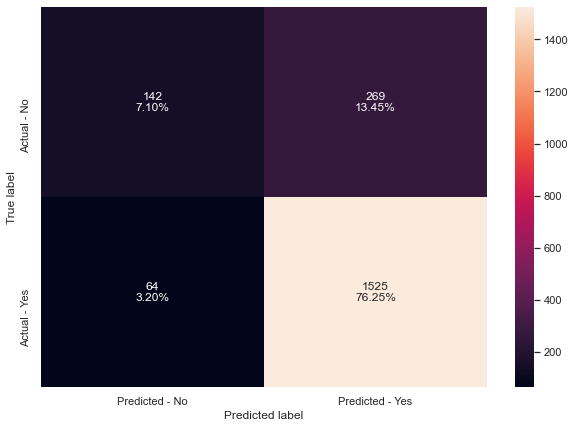

<IPython.core.display.Javascript object>

In [79]:
scores_LR = get_metrics_score(
    logreg, X_train_final, X_test_final, y_train, y_test, flag=True
)

# creating confusion matrix
make_confusion_matrix_logistic(logreg, X_test_final, y_test)

* Model is giving a generalized performance on training and test set.
* With a fewer number of features, the model performance is comparable to the initial logistic regression model.

### Model Performance Summary

In [80]:
# defining list of model
models = [lg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, X_train, X_test, y_train, y_test, flag=False)
    k = get_metrics_score(
        model,
        X_train,
        X_test,
        y_train,
        y_test,
        threshold=optimal_threshold_auc_roc,
        flag=False,
    )
    l = get_metrics_score(
        model,
        X_train,
        X_test,
        y_train,
        y_test,
        threshold=optimal_threshold_curve,
        flag=False,
    )

    # intial model
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

    # optimal threshold = 0.084
    acc_train.append(k[0])
    acc_test.append(k[1])
    recall_train.append(k[2])
    recall_test.append(k[3])
    precision_train.append(k[4])
    precision_test.append(k[5])
    f1_train.append(k[6])
    f1_test.append(k[7])

    # optimal threshold = 0.3
    acc_train.append(l[0])
    acc_test.append(l[1])
    recall_train.append(l[2])
    recall_test.append(l[3])
    precision_train.append(l[4])
    precision_test.append(l[5])
    f1_train.append(l[6])
    f1_test.append(l[7])

<IPython.core.display.Javascript object>

In [81]:
# defining list of model
models = [logreg]

# looping through all the models list to get the metrics score - Accuracy, Recall, Precision, and F1 score
for model in models:

    j = get_metrics_score(
        model, X_train_final, X_test_final, y_train, y_test, flag=False
    )
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

<IPython.core.display.Javascript object>

In [82]:
comparison_lg_frame = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Logistic Regression-0.275 Threshold",
            "Logistic Regression-0.34 Threshold)",
            "Logistic Regression (SFS - 7 variable)",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1_Score": f1_train,
        "Test_F1_Score": f1_test,
    }
)


comparison_lg_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1_Score,Test_F1_Score
0,Logistic Regression,0.84,0.83,0.38,0.35,0.71,0.70,0.49,0.46
1,Logistic Regression-0.275 Threshold,0.80,0.81,0.65,0.66,0.51,0.53,0.57,0.59
2,Logistic Regression-0.34 Threshold),0.83,0.83,0.57,0.57,0.58,0.59,0.57,0.58
3,Logistic Regression (SFS - 7 variable),0.84,0.83,0.38,0.35,0.71,0.69,0.49,0.46


<IPython.core.display.Javascript object>

### Observation on Logistic regression 
* For "Logistic Regression-0.275 Threshold" , train and test results foe REcall and Precision are very close , i.e model is not overfitting. 
* Compare to all other model, "Logistic Regression-0.275 Threshold" can be considered Best Model which has `Recall` of 0.66 with precision score of 0.53.

In [83]:
comparison_dl_frame = pd.DataFrame(
    {
        "Model": [
            "Deep neural network ",
            "Deep neural network-Early Stopping",
            "Deep neural network-Weight Initialization",
        ],
        "Test_Accuracy": dl_acc,
        "Test_Recall": dl_recall,
        "Test_Precision": dl_precision,
        "Test_F1_Score": dl_f1,
    }
)

comparison_dl_frame

,Model,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Deep neural network,0.85,0.46,0.71,0.56
1,Deep neural network-Early Stopping,0.86,0.44,0.76,0.55
2,Deep neural network-Weight Initialization,0.68,0.87,0.38,0.52


<IPython.core.display.Javascript object>

### Observation on Deep Neural Network
* Compare to all other model build using ANN, "Deep neural network-Weight Initialization" can be considered Best Model which has `Recall` of 0.87 with precision score of 0.38.
* Comparing both Model build through "Deep Neural Network approach" and "Logistic Regression" we can conclude that
 Model with "Deep neural network-Weight Initialization" is giving best result.

### Conclusion


* Female ratio is less than male but their exit rate is higher than male. They may be leaving because unable to maintain same level of income or temporary break from job. bank should come with Women's friendly service/products.

* Ratio of customer exiting in begning year is higest. Newer customer requirement should be understood or communicated correctly to retain them better.
* Product 3 and 4 has least subscription but highest exit rate. Marketing team needs to analyze the reason for Exit. In fact, all of the customer who has taken Product 4 has Exited.
* Although France has highest customer base but exit ratio in Germany is highest. There may be country/culture specific reason to exit. 
* Chances of Exiting for Customer closer to retirement is more because they may be replanning their finance after retirement therefore, getting rid of unnecessary accounts which they may have to maintain.
* There is no difference in exit ratio for customer owning Credit card or not owning credit card. Bank should focus slightly more on other than credit card service for reason of Exit.